In [1]:
import pandas as pd
import numpy as np
import psycopg2
import matplotlib.pyplot as plt
%matplotlib inline
import random
from sklearn.preprocessing import MinMaxScaler

In [9]:
sev_scores=pd.read_csv('../data/sev_scores.csv')
sev_scores[['sirs','oasis','sofa','sapsii','saps']] = MinMaxScaler().fit_transform(
    sev_scores[['sirs','oasis','sofa','sapsii','saps']])
sev_scores.head()

,icustay_id,sirs,oasis,sofa,sapsii,saps
0,200001,0.75,0.600000,0.272727,0.322034,0.454545
1,200003,1.00,0.500000,0.272727,0.254237,0.545455
2,200006,0.50,0.457143,0.045455,0.169492,0.340909
3,200007,0.50,0.371429,0.045455,0.152542,0.136364
4,200009,1.00,0.357143,0.136364,0.177966,0.295455


In [10]:
df_readm_clean_3 = pd.read_csv('../data/clean_readm_details.csv')
df_readm_clean_3=df_readm_clean_3.drop(['last_wardid'], axis=1)

print(df_readm_clean_3.head())

df_readm_clean_3= pd.get_dummies(df_readm_clean_3,columns=['gender','marital_status','insurance','first_careunit','last_careunit'],drop_first=False)

#normalize the data
df_readm_clean_3[['age']] = MinMaxScaler().fit_transform(df_readm_clean_3[['age']])
df_readm_clean_3.head()

   subject_id  hadm_id  icustay_id first_careunit last_careunit        age  \
0           3   145834      211552           MICU          MICU  76.526788   
1           4   185777      294638           MICU          MICU  47.845044   
2           6   107064      228232           SICU          SICU  65.940670   
3           9   150750      220597           MICU          MICU  41.790226   
4          11   194540      229441           SICU          SICU  50.148292   

  gender marital_status insurance  IsReadmitted  
0      M        MARRIED  Medicare             0  
1      F         SINGLE   Private             0  
2      F        MARRIED  Medicare             0  
3      M            NaN  Medicaid             0  
4      F        MARRIED   Private             0  


,subject_id,hadm_id,icustay_id,age,IsReadmitted,gender_F,gender_M,marital_status_DIVORCED,marital_status_LIFE PARTNER,marital_status_MARRIED,...,first_careunit_CCU,first_careunit_CSRU,first_careunit_MICU,first_careunit_SICU,first_careunit_TSICU,last_careunit_CCU,last_careunit_CSRU,last_careunit_MICU,last_careunit_SICU,last_careunit_TSICU
0,3,145834,211552,0.831283,0,0,1,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,4,185777,294638,0.443434,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,6,107064,228232,0.688133,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,9,150750,220597,0.361558,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,11,194540,229441,0.474580,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [11]:
levents_pivot=pd.read_csv('../data/levents_pivot.csv')
levents_pivot.columns = map(str.lower, levents_pivot.columns)

print(levents_pivot.shape)
#mean impute missing values
levents_pivot=levents_pivot.fillna(levents_pivot.mean())

levents_pivot=levents_pivot.set_index(['subject_id','hadm_id'])

#normalize the data
cols=levents_pivot.columns.values
levents_pivot[cols] = MinMaxScaler().fit_transform(levents_pivot[cols])
levents_pivot=levents_pivot.reset_index()
levents_pivot.head()

(58147, 52)


,subject_id,hadm_id,50802,50804,50808,50809,50810,50811,50813,50818,...,51254,51256,51265,51274,51275,51277,51279,51301,51491,51498
0,2,163353,0.935417,0.401119,0.055001,0.100713,0.152705,0.152356,0.077970,0.196142,...,0.058824,0.858586,0.095640,0.047439,0.157333,0.242567,0.179478,0.023419,0.226318,0.941890
1,3,145834,0.924633,0.293997,0.050964,0.163450,0.138413,0.138948,0.132468,0.128554,...,0.069020,0.837374,0.132754,0.043574,0.549298,0.494105,0.249204,0.026592,0.000000,0.945249
2,4,185777,0.934037,0.328125,0.055001,0.100713,0.152381,0.149893,0.073469,0.114943,...,0.029020,0.912458,0.181638,0.028107,0.121269,0.456517,0.259915,0.019982,0.437500,0.935560
3,5,178980,0.935417,0.401119,0.055001,0.100713,0.152705,0.152356,0.077970,0.196142,...,0.058824,0.797980,0.196241,0.047439,0.157333,0.522692,0.295522,0.029515,0.226318,0.941890
4,6,107064,0.926348,0.331250,0.056248,0.098293,0.130476,0.129622,0.095510,0.167816,...,0.018824,0.984848,0.156743,0.037979,0.276716,0.475579,0.263983,0.028850,0.226318,0.941890


In [12]:
levents_merged = pd.merge(df_readm_clean_3, levents_pivot, how='left', on=['subject_id', 'hadm_id'])
levents_merged = pd.merge(levents_merged, sev_scores, how='left', on=['icustay_id'])
levents_merged.head()

,subject_id,hadm_id,icustay_id,age,IsReadmitted,gender_F,gender_M,marital_status_DIVORCED,marital_status_LIFE PARTNER,marital_status_MARRIED,...,51277,51279,51301,51491,51498,sirs,oasis,sofa,sapsii,saps
0,3,145834,211552,0.831283,0,0,1,0,0,1,...,0.494105,0.249204,0.026592,0.000000,0.945249,0.75,0.814286,0.318182,0.669492,0.772727
1,4,185777,294638,0.443434,0,1,0,0,0,0,...,0.456517,0.259915,0.019982,0.437500,0.935560,0.50,0.371429,0.181818,0.296610,0.227273
2,6,107064,228232,0.688133,0,1,0,0,0,1,...,0.475579,0.263983,0.028850,0.226318,0.941890,0.25,0.157143,0.181818,0.203390,0.409091
3,9,150750,220597,0.361558,0,0,1,0,0,0,...,0.442879,0.336101,0.028659,0.375000,0.947319,0.75,0.500000,0.227273,0.262712,0.409091
4,11,194540,229441,0.474580,0,1,0,0,0,1,...,0.435055,0.318460,0.020870,0.000000,0.950141,0.75,0.414286,0.090909,0.211864,0.136364


In [13]:
#Ratio of readmitted cases
sum(levents_merged.IsReadmitted==1)/len(levents_merged.IsReadmitted)

0.11778741865509762

In [14]:
df_data=levents_merged
df_data=df_data.fillna(df_data.mean())
df_data.head()

,subject_id,hadm_id,icustay_id,age,IsReadmitted,gender_F,gender_M,marital_status_DIVORCED,marital_status_LIFE PARTNER,marital_status_MARRIED,...,51277,51279,51301,51491,51498,sirs,oasis,sofa,sapsii,saps
0,3,145834,211552,0.831283,0,0,1,0,0,1,...,0.494105,0.249204,0.026592,0.000000,0.945249,0.75,0.814286,0.318182,0.669492,0.772727
1,4,185777,294638,0.443434,0,1,0,0,0,0,...,0.456517,0.259915,0.019982,0.437500,0.935560,0.50,0.371429,0.181818,0.296610,0.227273
2,6,107064,228232,0.688133,0,1,0,0,0,1,...,0.475579,0.263983,0.028850,0.226318,0.941890,0.25,0.157143,0.181818,0.203390,0.409091
3,9,150750,220597,0.361558,0,0,1,0,0,0,...,0.442879,0.336101,0.028659,0.375000,0.947319,0.75,0.500000,0.227273,0.262712,0.409091
4,11,194540,229441,0.474580,0,1,0,0,0,1,...,0.435055,0.318460,0.020870,0.000000,0.950141,0.75,0.414286,0.090909,0.211864,0.136364


In [15]:
from keras.models import Sequential
from keras.layers import Dense , Dropout , Lambda, Flatten
from keras.optimizers import Adam ,RMSprop, SGD
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [16]:
df_train, df_cv = train_test_split(df_data, test_size=0.25, random_state=31)
y_train=df_train.IsReadmitted
y_cv=df_cv.IsReadmitted

X_train = df_train.drop(['IsReadmitted','subject_id','hadm_id','icustay_id'], axis=1)
X_cv = df_cv.drop(['IsReadmitted','subject_id','hadm_id','icustay_id'], axis=1)

print(sum(y_train==1)/len(y_train))
print(sum(y_cv==1)/len(y_cv))

0.1177692469499369
0.11784193090392807


In [17]:
# fix random seed for reproducibility
seed = 41
np.random.seed(seed)

In [18]:
X_train.head()

,age,gender_F,gender_M,marital_status_DIVORCED,marital_status_LIFE PARTNER,marital_status_MARRIED,marital_status_SEPARATED,marital_status_SINGLE,marital_status_UNKNOWN (DEFAULT),marital_status_WIDOWED,...,51277,51279,51301,51491,51498,sirs,oasis,sofa,sapsii,saps
48542,0.634103,0,1,0,0,0,0,0,0,1,...,0.464648,0.188570,0.006801,0.125000,0.937690,0.75,0.571429,0.500000,0.576271,0.545455
28724,0.967821,1,0,0,0,1,0,0,0,0,...,0.480125,0.302239,0.027590,0.000000,0.946378,1.00,0.728571,0.363636,0.474576,0.750000
39684,0.691176,0,1,0,0,1,0,0,0,0,...,0.444131,0.261493,0.016254,0.312500,0.947789,0.75,0.542857,0.272727,0.271186,0.431818
18245,0.658079,0,1,0,0,1,0,0,0,0,...,0.438445,0.270723,0.022794,0.267857,0.942078,1.00,0.600000,0.181818,0.330508,0.477273
23149,0.915499,1,0,0,0,1,0,0,0,0,...,0.438632,0.239659,0.021998,0.226318,0.941890,1.00,0.471429,0.136364,0.288136,0.477273


In [20]:
y_train.head()

48542    1
28724    0
39684    0
18245    0
23149    0
Name: IsReadmitted, dtype: int64

In [21]:
X_tr=X_train.reset_index(drop=True).values
y_tr=y_train.reset_index(drop=True).values
X_tr=np.float32(X_tr)
y_tr=np.float32(y_tr)

X_val=X_cv.reset_index(drop=True).values
y_val=y_cv.reset_index(drop=True).values
X_val=np.float32(X_val)
y_val=np.float32(y_val)

In [22]:
model = Sequential()
model.add(Dense(80, input_dim=X_tr.shape[1], activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dropout(0.10))
optimizer = 'adam'
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 80)                6480      
_________________________________________________________________
dense_2 (Dense)              (None, 40)                3240      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                410       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 10,141
Trainable params: 10,141
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
# Fit the model
model.fit(X_tr, y_tr, epochs=60, batch_size=20)

Epoch 1/60
38032/38032 [==============================] - 3s - loss: 0.3664 - acc: 0.8817     
Epoch 2/60
38032/38032 [==============================] - 3s - loss: 0.3519 - acc: 0.8822     
Epoch 3/60
38032/38032 [==============================] - 3s - loss: 0.3472 - acc: 0.8823     
Epoch 4/60
38032/38032 [==============================] - 3s - loss: 0.3441 - acc: 0.8822     
Epoch 5/60
38032/38032 [==============================] - 2s - loss: 0.3427 - acc: 0.8822     
Epoch 6/60
38032/38032 [==============================] - 3s - loss: 0.3419 - acc: 0.8822     
Epoch 7/60
38032/38032 [==============================] - 3s - loss: 0.3397 - acc: 0.8822     
Epoch 8/60
38032/38032 [==============================] - 3s - loss: 0.3384 - acc: 0.8823     
Epoch 9/60
38032/38032 [==============================] - 3s - loss: 0.3375 - acc: 0.8822     
Epoch 10/60
38032/38032 [==============================] - 3s - loss: 0.3364 - acc: 0.8822     
Epoch 11/60
38032/38032 [========================

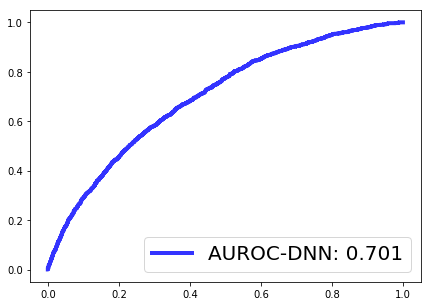

In [24]:
preds = model.predict(X_val)

from sklearn.metrics import roc_curve, auc

# get 0/1 binary lable for each patient encounter
label = y_cv

# get the last prediction in [0,1] for the patient
prediction = preds

# compute ROC curve for predictions
rnn_roc = roc_curve(label,prediction)

# compute the area under the curve of prediction ROC
rnn_auc = auc(rnn_roc[0], rnn_roc[1])
plt.figure(figsize=(7, 5))
line_kwargs = {'linewidth': 4, 'alpha': 0.8}
plt.plot(rnn_roc[0], rnn_roc[1], label='AUROC-DNN: %0.3f' % rnn_auc, color='blue', **line_kwargs)
plt.legend(loc='lower right', fontsize=20)

--- 

## Interpretable Model

In [95]:
#!conda install py-xgboost -y

Fetching package metadata ...........
Solving package specifications: .

Package plan for installation in environment /home/rafiparvez1706/anaconda3:

The following NEW packages will be INSTALLED:

    libxgboost: 0.60-hdfa14d8_0                     
    py-xgboost: 0.60-py35np112h32b46d2_0            

The following packages will be UPDATED:

    conda:      4.3.29-py35_0            conda-forge --> 4.3.30-py35hf9359ed_0
    conda-env:  2.6.0-0                  conda-forge --> 2.6.0-h36134e3_1     

The following packages will be DOWNGRADED:

    numpy:      1.13.3-py35hd829ed6_0                --> 1.12.1-py35hca0bb5e_1

libxgboost-0.6 100% |################################| Time: 0:00:00  16.81 MB/s
numpy-1.12.1-p 100% |################################| Time: 0:00:00  38.17 MB/s
py-xgboost-0.6 100% |################################| Time: 0:00:00  47.28 MB/s


In [25]:
import xgboost as xgb
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split

from sklearn.cross_validation import *
from sklearn.grid_search import GridSearchCV

from xgboost import plot_importance
from matplotlib import pyplot

/home/rafiparvez1706/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/rafiparvez1706/anaconda3/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [ ]:
xgb_model = xgb.XGBRegressor()

In [27]:
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05], #so called `eta` value
              'max_depth': [6],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [5], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337]}

In [28]:
clf = GridSearchCV(xgb_model, parameters, n_jobs=5, 
                   cv=StratifiedKFold(y_train, n_folds=5, shuffle=True), 
                   scoring='roc_auc',
                   verbose=2, refit=True)

clf.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.7, subsample=0.8, max_depth=6, learning_rate=0.05, min_child_weight=11, missing=-999, seed=1337, n_estimators=5, objective=binary:logistic, silent=1, nthread=4 
[CV] colsample_bytree=0.7, subsample=0.8, max_depth=6, learning_rate=0.05, min_child_weight=11, missing=-999, seed=1337, n_estimators=5, objective=binary:logistic, silent=1, nthread=4 
[CV] colsample_bytree=0.7, subsample=0.8, max_depth=6, learning_rate=0.05, min_child_weight=11, missing=-999, seed=1337, n_estimators=5, objective=binary:logistic, silent=1, nthread=4 
[CV] colsample_bytree=0.7, subsample=0.8, max_depth=6, learning_rate=0.05, min_child_weight=11, missing=-999, seed=1337, n_estimators=5, objective=binary:logistic, silent=1, nthread=4 
[CV] colsample_bytree=0.7, subsample=0.8, max_depth=6, learning_rate=0.05, min_child_weight=11, missing=-999, seed=1337, n_estimators=5, objective=binary:logistic, silent=1, nthread=4 
[CV]  colsample_

[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    2.0s remaining:    3.0s


[CV]  colsample_bytree=0.7, subsample=0.8, max_depth=6, learning_rate=0.05, min_child_weight=11, missing=-999, seed=1337, n_estimators=5, objective=binary:logistic, silent=1, nthread=4 -   1.9s
[CV]  colsample_bytree=0.7, subsample=0.8, max_depth=6, learning_rate=0.05, min_child_weight=11, missing=-999, seed=1337, n_estimators=5, objective=binary:logistic, silent=1, nthread=4 -   2.0s


[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    2.2s finished


GridSearchCV(cv=sklearn.cross_validation.StratifiedKFold(labels=[1 0 ..., 0 1], n_folds=5, shuffle=True, random_state=None),
       error_score='raise',
       estimator=XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=5,
       param_grid={'colsample_bytree': [0.7], 'subsample': [0.8], 'max_depth': [6], 'silent': [1], 'learning_rate': [0.05], 'min_child_weight': [11], 'missing': [-999], 'seed': [1337], 'n_estimators': [5], 'nthread': [4], 'objective': ['binary:logistic']},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=2)

In [29]:
best_parameters, score, _ = max(clf.grid_scores_, key=lambda x: x[1])
print('Raw AUC score:', score)

Raw AUC score: 0.704227386374676


In [30]:
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

colsample_bytree: 0.7
learning_rate: 0.05
max_depth: 6
min_child_weight: 11
missing: -999
n_estimators: 5
nthread: 4
objective: 'binary:logistic'
seed: 1337
silent: 1
subsample: 0.8


In [60]:
#plot_importance(clf)
#pyplot.show()

In [31]:
#xgb_model = xgb.XGBClassifier()

In [34]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

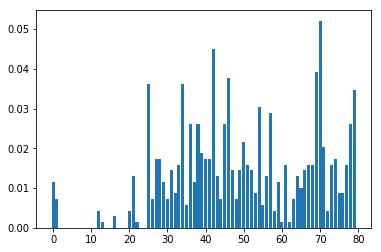

In [35]:
pyplot.bar(range(len(xgb_model.feature_importances_)), (xgb_model.feature_importances_))
pyplot.show()

In [36]:
args=np.argsort(xgb_model.feature_importances_)

In [37]:
new_args=list(args)
new_args=new_args[::-1]

In [38]:
cols = X_train.columns.values

In [39]:
features=cols[new_args]
features

array(['51277', '50882', '51275', '50910', '50802', '50821', 'saps',
       '51006', '51200', '50824', '50862', 'sapsii', '50902', '50960',
       '51279', '50863', '50878', '50808', '51498', '50809', '50868',
       '51244', '51491', 'sofa', '51274', '51265', '50820', '50970',
       '50954', '50912', '50813', '51256', '50971', '51146', '51250',
       '50885', 'last_careunit_CSRU', '50861', '50810', 'age', '51222',
       '51254', 'sirs', 'oasis', '50983', '50818', '51249', '50931',
       'gender_F', '50811', '50804', '50893', '50822', '51144',
       'last_careunit_CCU', 'insurance_Medicare', '51301', '51221',
       'first_careunit_CSRU', 'last_careunit_MICU', '51248',
       'insurance_Private', '51237', 'marital_status_UNKNOWN (DEFAULT)',
       'gender_M', 'marital_status_DIVORCED',
       'marital_status_LIFE PARTNER', 'marital_status_MARRIED',
       'marital_status_SEPARATED', 'marital_status_SINGLE',
       'insurance_Medicaid', 'marital_status_WIDOWED',
       'insurance_G

## Training with soft labels

In [40]:
y_train_soft = model.predict(X_tr)

In [ ]:
xgb_model = xgb.XGBRegressor()

In [ ]:
clf = GridSearchCV(xgb_model, parameters, n_jobs=5, 
                   cv=StratifiedKFold(y_train, n_folds=5, shuffle=True), 
                   scoring='roc_auc',
                   verbose=2, refit=True)

clf.fit(X_train, y_train_soft.ravel())

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.7, subsample=0.8, max_depth=6, learning_rate=0.05, min_child_weight=11, missing=-999, seed=1337, n_estimators=5, objective=binary:logistic, silent=1, nthread=4 
[CV] colsample_bytree=0.7, subsample=0.8, max_depth=6, learning_rate=0.05, min_child_weight=11, missing=-999, seed=1337, n_estimators=5, objective=binary:logistic, silent=1, nthread=4 
[CV] colsample_bytree=0.7, subsample=0.8, max_depth=6, learning_rate=0.05, min_child_weight=11, missing=-999, seed=1337, n_estimators=5, objective=binary:logistic, silent=1, nthread=4 
[CV] colsample_bytree=0.7, subsample=0.8, max_depth=6, learning_rate=0.05, min_child_weight=11, missing=-999, seed=1337, n_estimators=5, objective=binary:logistic, silent=1, nthread=4 
[CV] colsample_bytree=0.7, subsample=0.8, max_depth=6, learning_rate=0.05, min_child_weight=11, missing=-999, seed=1337, n_estimators=5, objective=binary:logistic, silent=1, nthread=4 


In [ ]:
best_parameters, score, _ = max(clf.grid_scores_, key=lambda x: x[1])
print('Raw AUC score:', score)

In [93]:
y_cv_preds=clf.predict(X_cv)

In [94]:
y_cv_preds

array([ 0.41664794,  0.401701  ,  0.42323938, ...,  0.39888313,
        0.39718488,  0.39768648], dtype=float32)

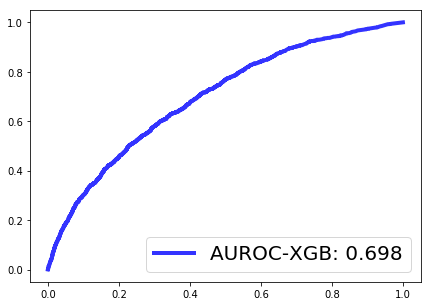

In [95]:
preds = model.predict(X_val)

from sklearn.metrics import roc_curve, auc

# get 0/1 binary lable for each patient encounter
label = y_cv

# get the last prediction in [0,1] for the patient
prediction = y_cv_preds

# compute ROC curve for predictions
rnn_roc = roc_curve(label,prediction)

# compute the area under the curve of prediction ROC
rnn_auc = auc(rnn_roc[0], rnn_roc[1])
plt.figure(figsize=(7, 5))
line_kwargs = {'linewidth': 4, 'alpha': 0.8}
plt.plot(rnn_roc[0], rnn_roc[1], label='AUROC-XGB: %0.3f' % rnn_auc, color='blue', **line_kwargs)
plt.legend(loc='lower right', fontsize=20)

In [ ]:
from xgboost import plot_importance

In [ ]:
plot_importance(clf)

In [ ]:
plot_importance(model)
pyplot.show()

## XGBoost

In [97]:
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [ ]:
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, train, predictors)